# Задача классификации


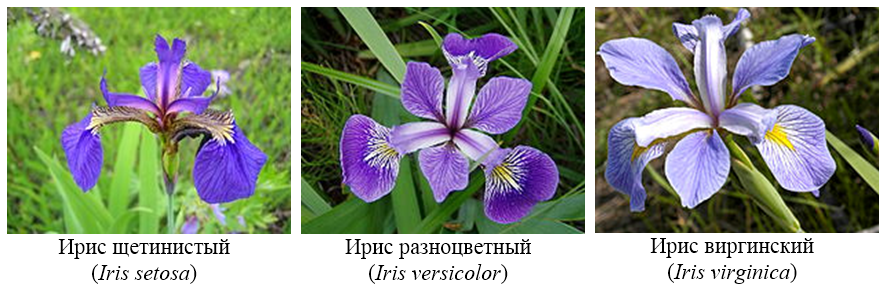

**Классификация данных** — это процесс отнесения объектов или наблюдений к одной из заранее определённых категорий на основе их характеристик. Это один из основных методов машинного обучения, который используется для решения задач предсказания и анализа.

Классификация может быть выполнена с помощью различных алгоритмов машинного обучения, таких как деревья решений, нейронные сети, логистическая регрессия и другие. Выбор алгоритма зависит от характера данных, количества категорий и других факторов.

# Пример работы методов классификации на основе датасета Ирисов Фишера

## Загрузка данных

In [1]:
from sklearn import datasets # Встроенные датасеты
import pandas as pd

iris = datasets.load_iris() # Получаем датасет Ирисов Фишера

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # Переводим в DataFrame
iris_df['target'] = pd.Series(iris.target) # 1 столбец
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Аннотация

Набор данных содержит информацию о характеристике ирисов.

Количество значений: 150

Признаки:
1. `sepal length (cm)` - длина наружной доли околоцветника;
2. `sepal width (cm)` - ширина наружной доли околоцветника;
3. `petal length (cm)` - длина внутренней доли околоцветника;
4. `petal width (cm)` - ширина внутренней доли околоцветника.

Целевая переменная:
* `target` - закодированный подвид цветка, 0 - Setosa, 1 - Versocolor, 3 - Virginica.

## Визуализация

In [4]:
import matplotlib.pyplot as plt

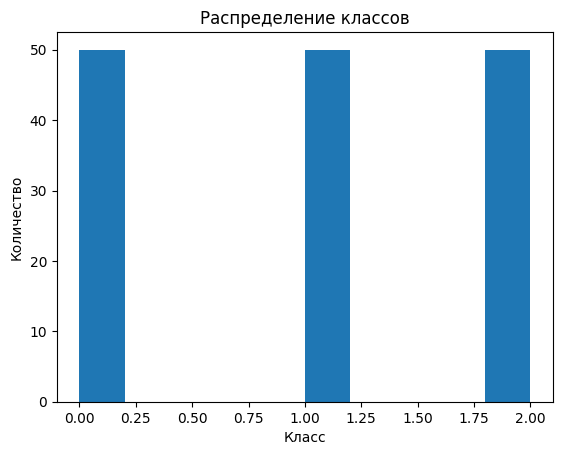

In [5]:
plt.hist(iris_df.target)
plt.title("Распределение классов")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

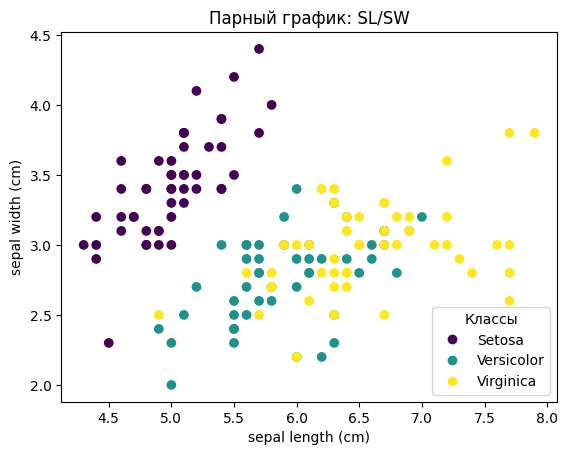

In [4]:
plot = plt.scatter(iris_df["sepal length (cm)"], iris_df["sepal width (cm)"], c=iris_df.target) # Парные графики с разметкой классов
plt.title("Парный график: SL/SW")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend(plot.legend_elements()[0], ["Setosa", "Versicolor", "Virginica"], loc="lower right", title="Классы") # Легенда

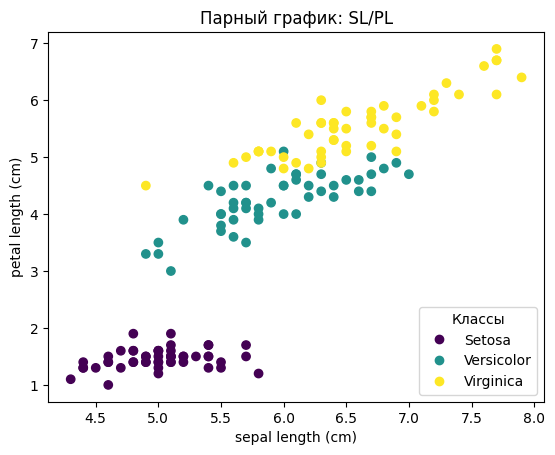

In [5]:
plot = plt.scatter(iris_df["sepal length (cm)"], iris_df["petal length (cm)"], c=iris_df.target)
plt.title("Парный график: SL/PL")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend(plot.legend_elements()[0], ["Setosa", "Versicolor", "Virginica"], loc="lower right", title="Классы")

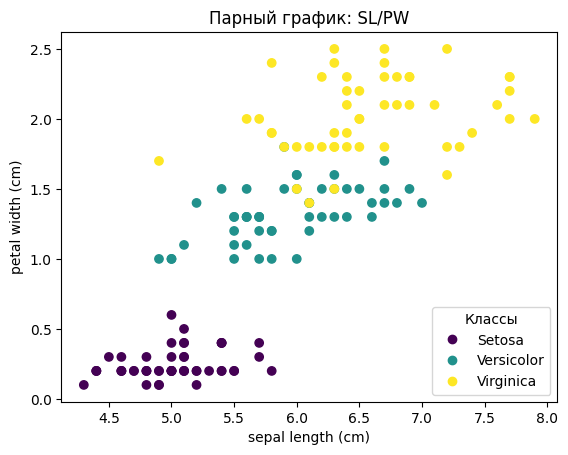

In [6]:
plot = plt.scatter(iris_df["sepal length (cm)"], iris_df["petal width (cm)"], c=iris_df.target)
plt.title("Парный график: SL/PW")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(plot.legend_elements()[0], ["Setosa", "Versicolor", "Virginica"], loc="lower right", title="Классы")

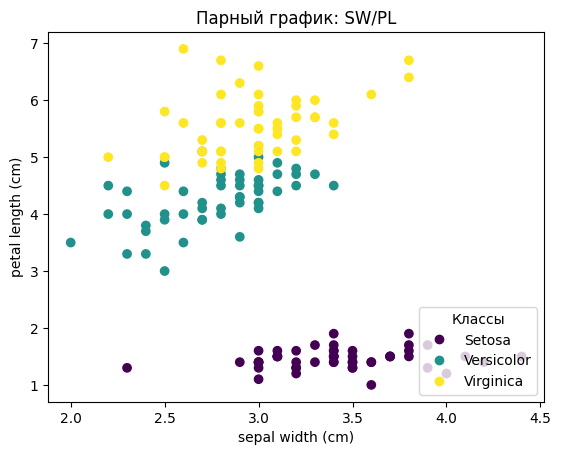

In [7]:
plot = plt.scatter(iris_df["sepal width (cm)"], iris_df["petal length (cm)"], c=iris_df.target)
plt.title("Парный график: SW/PL")
plt.xlabel("sepal width (cm)")
plt.ylabel("petal length (cm)")
plt.legend(plot.legend_elements()[0], ["Setosa", "Versicolor", "Virginica"], loc="lower right", title="Классы")

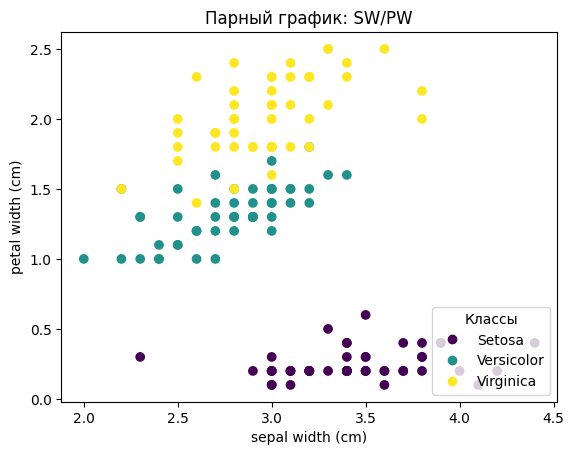

In [8]:
plot = plt.scatter(iris_df["sepal width (cm)"], iris_df["petal width (cm)"], c=iris_df.target)
plt.title("Парный график: SW/PW")
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width (cm)")
plt.legend(plot.legend_elements()[0], ["Setosa", "Versicolor", "Virginica"], loc="lower right", title="Классы")

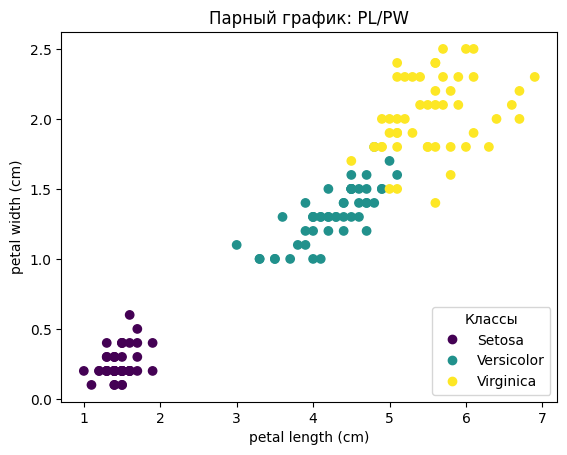

In [9]:
plot = plt.scatter(iris_df["petal length (cm)"], iris_df["petal width (cm)"], c=iris_df.target)
plt.title("Парный график: PL/PW")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(plot.legend_elements()[0], ["Setosa", "Versicolor", "Virginica"], loc="lower right", title="Классы")

In [6]:
import seaborn as sns

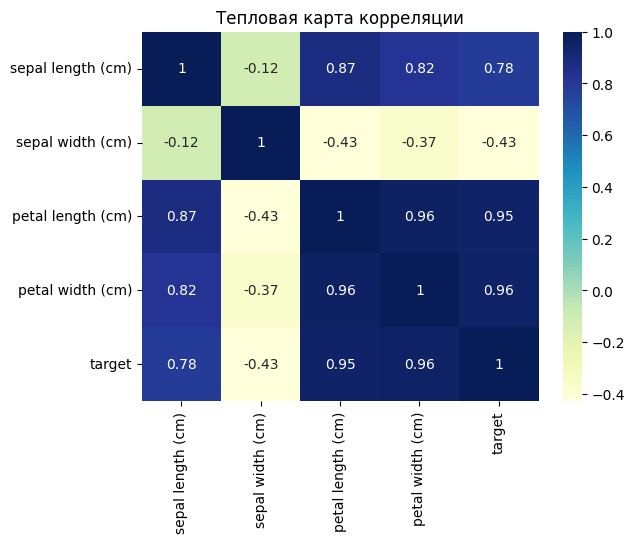

In [7]:
sns.heatmap(iris_df.corr(), cmap="YlGnBu", annot=True)
plt.title("Тепловая карта корреляции")
plt.show()

## Модели Классификации из библиотеки [scilit-learn](https://scikit-learn.org/stable/index.html)

**Scikit-learn** — это библиотека машинного обучения на языке Python. Она предоставляет простой и эффективный инструментарий для решения задач классификации, регрессии и кластеризации. Scikit-learn является одной из самых популярных библиотек машинного обучения и широко используется в научных исследованиях и промышленности.

### Разделение выборки на тренировочную и тестовую части



In [12]:
from sklearn.model_selection import train_test_split

X = iris_df.drop(columns='target')
y = iris_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K ближайших соседей

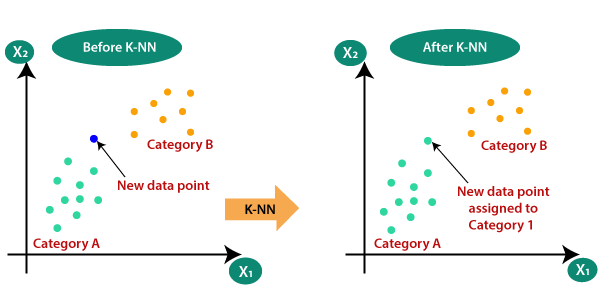

**KNearestNeighborClassifier** — это алгоритм классификации, основанный на методе k-ближайших соседей. Он относится к группе непараметрических алгоритмов и широко используется в задачах машинного обучения.

Основная идея метода заключается в том, что объект относится к тому классу, который является наиболее распространённым среди его k ближайших соседей в пространстве признаков. Соседи определяются на основе расстояния между объектами в этом пространстве. Чем меньше расстояние, тем больше сходство между объектами.

Алгоритм KNearestNeighborClassifier имеет несколько параметров, которые можно настроить для повышения точности классификации:
* **k**: количество ближайших соседей, которое будет учитываться при классификации объекта. Обычно выбирается чётное значение, чтобы избежать ситуации, когда один сосед сильно влияет на результат.
* **metric**: функция расстояния, которая будет использоваться для определения близости объектов. Наиболее часто используются евклидово расстояние и манхэттенское расстояние.
* **weights**: способ учёта влияния ближайших соседей на классификацию объекта. Могут быть использованы равные веса (uniform), веса, обратно пропорциональные расстоянию (distance), или другие функции весов.

Преимущества алгоритма KNearestNeighborClassifier:
1. Простота реализации и понимания.
2. Не требует обучения и может работать с данными любого размера и формы.
3. Может обрабатывать как числовые, так и категориальные признаки.
4. Хорошо работает с зашумлёнными данными и выбросами.
5. Может быть легко адаптирован для задач регрессии и ранжирования.

Недостатки алгоритма KNearestNeighborClassifier:
1. Требует большого объёма памяти для хранения данных о всех объектах.
2. Имеет низкую скорость работы при большом количестве объектов и признаков.
3. Чувствителен к выбору значения k и метрики расстояния.

Для использования алгоритма KNearestNeighborClassifier необходимо выбрать значение k, функцию расстояния и, возможно, функцию весов. Затем можно применить алгоритм к обучающей выборке данных и получить модель классификации. После этого модель можно использовать для классификации новых объектов.

Предположим, в нашем наборе есть два признака. Тогда мы можем примеры изобразить на координатной прямой.

У нас есть набор бирюзовых и синих точек. Теперь нужно сделать предсказание для оранжевой точки.

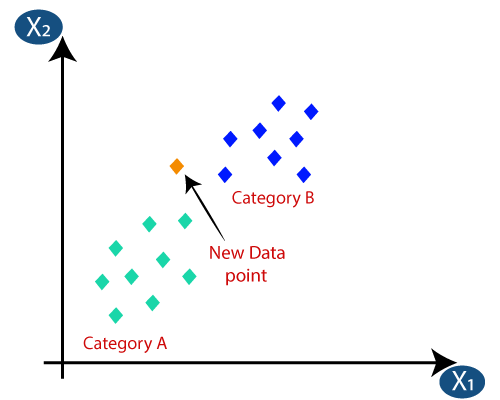

Выбираем количество соседей (5).

Выбираем метрику расстояния между точками для поиска ближайших точек по этой метрике.

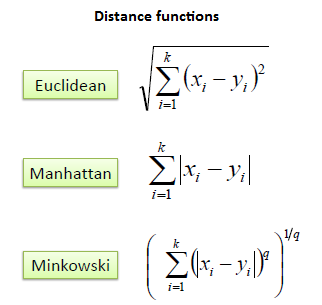

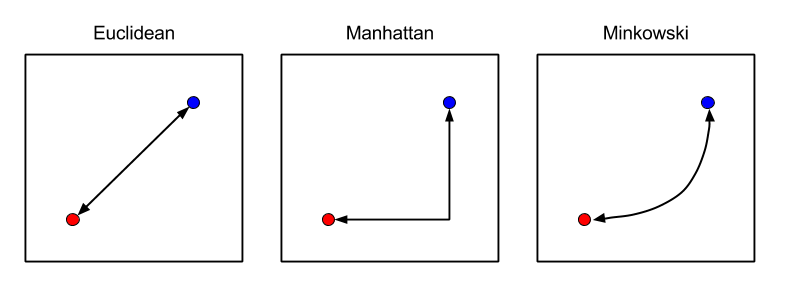

Ищем 5 соседних точек

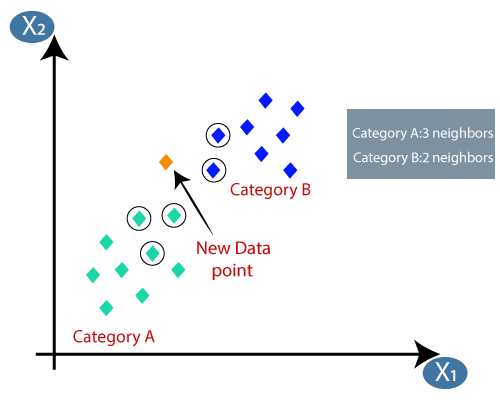

Самый популярный класс и будет класс для новой точки

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

In [13]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [14]:
y_pred = knn_model.predict(X_test) # Предсказание
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Оценка качества обученной модели

##### Точность - доля верноспрогнозированных классов


$$accuracy(a, x) = \frac {1} {n} \sum_{i=1}^n [a(x_{i})=y_{i}]$$

где n - количество примеров

a - классификатор

x_i - вход i-го примера

y_i - выход i-го примера

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, y_pred) # Подсчет точности

1.0

##### Точность (precision) и полнота (recall) системы

Точность системы – это доля примеров действительно принадлежащих данному классу относительно всех примеров которые система отнесла к этому классу.

$$precision = \frac {TP} {TP + FP} $$


Полнота системы – это доля найденных классфикатором примеров принадлежащих классу относительно всех примеров этого класса.

$$ recall = \frac {TP} {TP + FN} $$


- TP — истино-положительное решение
- TN — истино-отрицательное решение
- FP — ложно-положительное решение
- FN — ложно-отрицательное решение

In [17]:
from sklearn.metrics import precision_score, recall_score

In [18]:
precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro')

(1.0, 1.0)

##### F-мера

F-мера является хорошим кандидатом на формальную метрику оценки качества классификатора. Она сводит к одному числу две других основополагающих метрики: точность и полноту. Имея в своем распоряжении подобный механизм оценки вам будет гораздо проще принять решение о том являются ли изменения в алгоритме в лучшую сторону или нет.

$$F = \frac {2*precision*recall} {precision + recall}$$

In [19]:
from sklearn.metrics import f1_score

In [20]:
f1_score(y_test, y_pred, average='micro')

1.0

##### Полный отчет

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor", "Virginica"]))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Вывод матрицы ошибок



In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

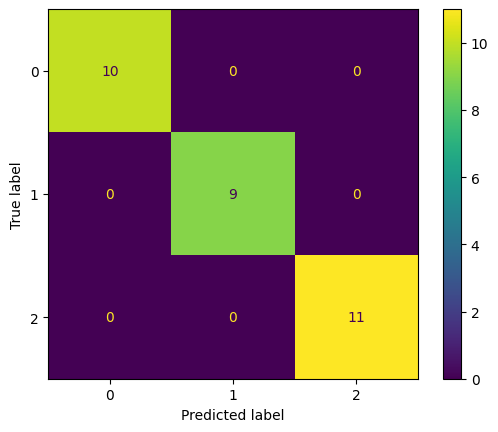

In [24]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### Машина опорных векторов

Метод опорных векторов – математически строго обоснованный метод, идея которого состоит в максимизации ширины разделяющей полосы между классами.

In [25]:
from sklearn.svm import SVC

In [26]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

Обучим модели с разными ядрами на признаках:
* sepal length (cm)
* sepal width (cm)

In [27]:
X1 = X.filter(items=["sepal length (cm)", "sepal width (cm)"])
X1_train, X1_test ,y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.inspection import DecisionBoundaryDisplay # Отображение рещультата обучения

In [29]:
?DecisionBoundaryDisplay

Init signature: DecisionBoundaryDisplay(*, xx0, xx1, response, xlabel=None, ylabel=None)
Docstring:     
Decisions boundary visualization.

It is recommended to use
:func:`~sklearn.inspection.DecisionBoundaryDisplay.from_estimator`
to create a :class:`DecisionBoundaryDisplay`. All parameters are stored as
attributes.

Read more in the :ref:`User Guide <visualizations>`.

.. versionadded:: 1.1

Parameters
----------
xx0 : ndarray of shape (grid_resolution, grid_resolution)
    First output of :func:`meshgrid <numpy.meshgrid>`.

xx1 : ndarray of shape (grid_resolution, grid_resolution)
    Second output of :func:`meshgrid <numpy.meshgrid>`.

response : ndarray of shape (grid_resolution, grid_resolution)
    Values of the response function.

xlabel : str, default=None
    Default label to place on x axis.

ylabel : str, default=None
    Default label to place on y axis.

Attributes
----------
surface_ : matplotlib `QuadContourSet` or `QuadMesh`
    If `plot_method` is 'contour' or 'contou

Машина опорных векторов обученная на SP и SW


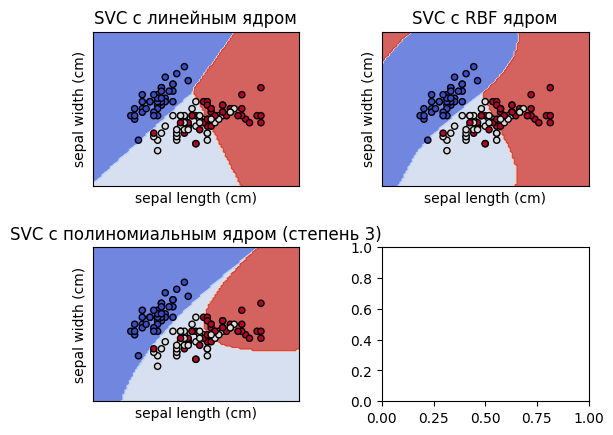

In [30]:
# объявляем модели
models = [
    SVC(kernel="linear"),
    SVC(kernel="rbf", gamma=0.7),
    SVC(kernel="poly", degree=3, gamma="auto"),
]

# настраиваем модели
models = [clf.fit(X1_train, y1_train) for clf in models]

titles = [
    "SVC с линейным ядром",
    "SVC с RBF ядром",
    "SVC с полиномиальным ядром (степень 3)"
]

print("Машина опорных векторов обученная на SP и SW")
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4) # Отступы

X0, X1 = X1_train["sepal length (cm)"], X1_train["sepal width (cm)"] # Оси

# строим графики
for clf, title, ax in zip(models, titles, sub.flatten()): #Функция zip упаковывет в общую последовательность
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X1_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="sepal length (cm)",
        ylabel="sepal width (cm)",
    )
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [35]:
y1_line_pred = models[0].predict(X1_test)
y1_rbf_pred = models[1].predict(X1_test)
y1_poly_pred = models[2].predict(X1_test)

acc1_line = accuracy_score(y1_line_pred, y1_test)
acc1_rbf = accuracy_score(y1_rbf_pred, y1_test)
acc1_poly = accuracy_score(y1_poly_pred, y1_test)

print(f"Точность с линейным ядром: {acc1_line}")
print(f"Точность с RBF ядром: {acc1_rbf}")
print(f"Точность с полиномиальным ядром: {acc1_poly}")

Точность с линейным ядром: 0.9
Точность с RBF ядром: 0.9
Точность с полиномиальным ядром: 0.8


На каких признаках обучение пройдёт лучше?

Обучим модели с разными ядрами на признаках:
* petal length (cm)
* petal width (cm)

In [32]:
X1 = X.filter(items=["petal length (cm)", "petal width (cm)"])
X1_train, X1_test ,y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

Машина опорных векторов обученная на SP и SW


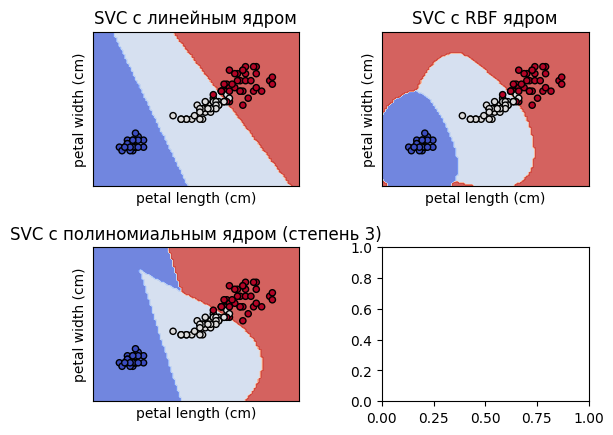

In [33]:
# объявляем модели
models = [
    SVC(kernel="linear"),
    SVC(kernel="rbf", gamma=0.7),
    SVC(kernel="poly", degree=3, gamma="auto"),
]

# настраиваем модели
models = [clf.fit(X1_train, y1_train) for clf in models]

titles = [
    "SVC с линейным ядром",
    "SVC с RBF ядром",
    "SVC с полиномиальным ядром (степень 3)"
]

print("Машина опорных векторов обученная на SP и SW")
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4) # Отступы

X0, X1 = X1_train["petal length (cm)"], X1_train["petal width (cm)"] # Оси

# строим графики
for clf, title, ax in zip(models, titles, sub.flatten()): #Функция zip упаковывет в общую последовательность
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X1_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="petal length (cm)",
        ylabel="petal width (cm)",
    )
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [34]:
y1_line_pred = models[0].predict(X1_test)
y1_rbf_pred = models[1].predict(X1_test)
y1_poly_pred = models[2].predict(X1_test)

acc1_line = accuracy_score(y1_line_pred, y1_test)
acc1_rbf = accuracy_score(y1_rbf_pred, y1_test)
acc1_poly = accuracy_score(y1_poly_pred, y1_test)

print(f"Точность с линейным ядром: {acc1_line}")
print(f"Точность с RBF ядром: {acc1_rbf}")
print(f"Точность с полиномиальным ядром: {acc1_poly}")

Точность с линейным ядром: 1.0
Точность с RBF ядром: 1.0
Точность с полиномиальным ядром: 1.0


### Дерево решений

**Дерево решений** — это один из методов машинного обучения, используемый для задач классификации и регрессии.

В машинном обучении дерево решений представляет собой структуру данных, которая состоит из узлов (вершин) и рёбер (связей). В узлах находятся вопросы или условия, а рёбра представляют возможные ответы или исходы. Дерево решений строится на основе обучающих данных и используется для предсказания значений целевой переменной на новых данных.

Процесс построения дерева решений включает следующие шаги:
1. Выбор атрибута для разделения данных на подмножества.
2. Разделение данных на подмножества в зависимости от значения выбранного атрибута.
3. Повторение шагов 1 и 2 до тех пор, пока не будет достигнуто условие остановки (например, все элементы в узле принадлежат к одному классу или количество элементов в узле меньше определённого порога).

Преимущества использования деревьев решений включают:
* Простоту понимания и интерпретации результатов.
* Возможность работы с категориальными и непрерывными данными.
* Нечувствительность к выбросам и аномалиям в данных.
* Автоматическое извлечение правил из данных.

Однако деревья решений имеют и некоторые ограничения:
* Переобучение на обучающих данных.
* Сложность выбора оптимального атрибута для разбиения данных.
* Отсутствие гарантий оптимальности решения.

Деревья решений широко используются в задачах машинного обучения и могут быть адаптированы для различных целей и условий.

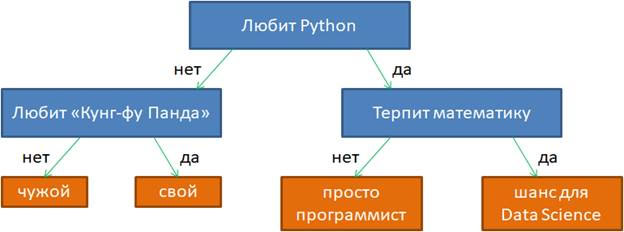

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Классификатор и график

In [36]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [37]:
?plot_tree

Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, default=None
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : array-like of str, default=None
    Names of each of the features.
    If None, generic names will be used ("x[0]

In [38]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

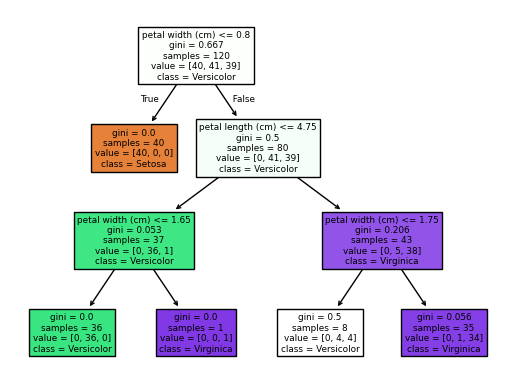

In [39]:
plot_tree(tree_clf,
          feature_names=X_train.columns,
          class_names=["Setosa", "Versicolor", "Virginica"],
          filled=True)
plt.show()

In [40]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Случай неиделального датасета

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


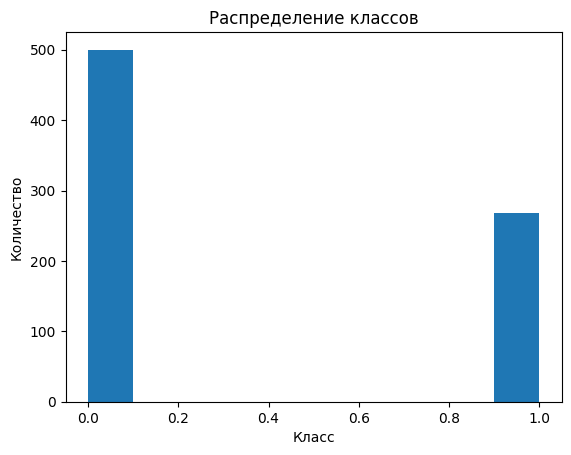

In [47]:
plt.hist(data.diabetes)
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.title("Распределение классов")
plt.show()

In [48]:
data.diabetes.value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [49]:
500/728

0.6868131868131868

Класс 0 доминирует над классом 1

## Балансировка данных

### Взвешивание классов (Class Weighting)
Одним из первых методов является метод взвешивания классов. Этот метод позволяет учесть дисбаланс между классами в процессе обучения модели. Он основан на идее того, что модель будет штрафовать более сильно за ошибки в классе-меньшинстве, поощряя более точное предсказание.
Принцип работы взвешивания классов заключается в присвоении разных весов каждому классу в зависимости от его доли в данных. Это позволяет модели лучше справляться с классом-меньшинством.

`SVC(kernel='linear', class_weight='balanced')`


### Группы методов для работы с дисбалансированными выборками:

- Under-sampling - уменьшение количества объектов доминирующего класса.
- Over-sampling - увеличение количества объектов minor-класса.
- Одновременное использование Under-sampling и Over-sampling.
- Ансамблевые методы, построенные с учетом дисбалансированных выборок.

## Масштабирование

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
columns = data.columns
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columns)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [53]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разделение на подвыборки

In [54]:
X = data.drop(columns='diabetes')
y = data.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Подбор гиперпараметров

**Гиперпараметры** — это настраиваемые параметры модели машинного обучения, которые не могут быть изучены в процессе обучения. Они определяют структуру и поведение модели и влияют на её производительность.

В отличие от параметров модели, которые определяются в процессе обучения на основе данных, гиперпараметры задаются до начала обучения и не изменяются во время него. Гиперпараметры могут включать такие значения, как количество слоёв нейронной сети, размер ядра свёрточной нейронной сети или коэффициент регуляризации в линейной регрессии.

Выбор оптимальных гиперпараметров может существенно повлиять на производительность модели. Для этого используются различные методы, такие как поиск по сетке (Grid Search), случайный поиск (Random Search) или байесовская оптимизация. Эти методы позволяют перебрать множество комбинаций гиперпараметров и выбрать наилучшую для данной задачи.

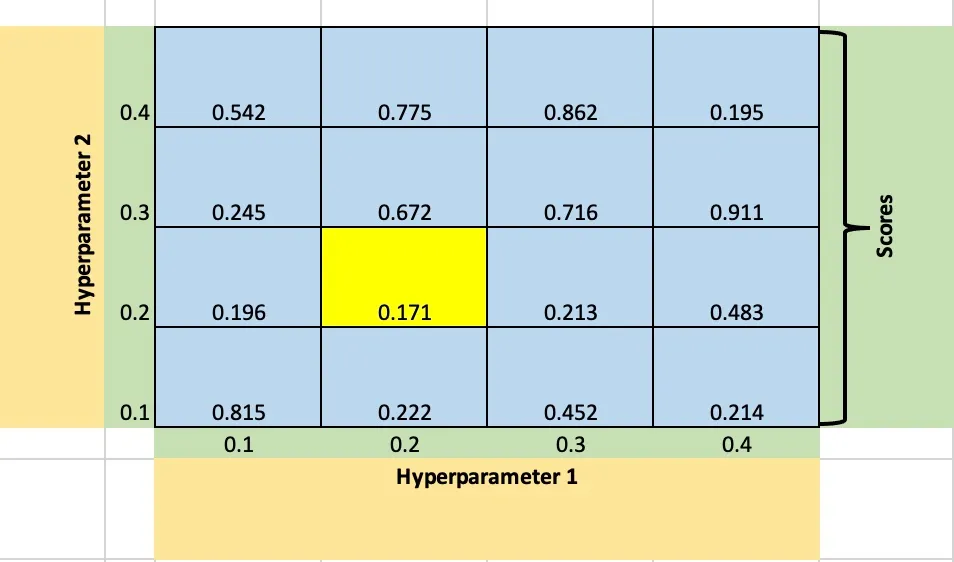

In [55]:
from sklearn.model_selection import GridSearchCV # Поиск гиперпараметров

In [56]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [57]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [58]:
grid = {
    "C": [0.5, 1.0, 1.5],
    "kernel": ["linear", "poly", "rbf"],
    "class_weight": ["balanced", None]
} # Значения гиперпараметров

In [59]:
model = SVC()

In [62]:
search = GridSearchCV(model, grid, cv=15, verbose=1)
search.fit(X_train, y_train)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


GridSearchCV(cv=15, estimator=SVC(),
             param_grid={'C': [0.5, 1.0, 1.5],
                         'class_weight': ['balanced', None],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [63]:
search.best_estimator_

SVC(C=0.5, class_weight='balanced', kernel='poly')

In [64]:
model = search.best_estimator_ # Лучшая модель

In [65]:
model.fit(X_train, y_train)

SVC(C=0.5, class_weight='balanced', kernel='poly')

In [66]:
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, y_pred, target_names=["Нет диабета", "Есть диабет"]))

              precision    recall  f1-score   support

 Нет диабета       0.80      0.73      0.76        99
 Есть диабет       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



# Сохранение модели

In [69]:
from joblib import dump # Сохранение
dump(model, 'best_model.joblib')

['best_model.joblib']

# Загрузка модели

In [70]:
from joblib import load # Загрузка
model = load('best_model.joblib')

In [71]:
model

SVC(C=0.5, class_weight='balanced', kernel='poly')